In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

ldir = os.chdir(r'C:\Users\Gergely\Documents\Datasets')

In [2]:
df = pd.read_csv('Cars.csv')
df.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


In [3]:
df.shape

(406, 9)

In [4]:
df.dropna(inplace=True)

In [5]:
sns.set_style('darkgrid')
sns.set_palette('bright')

### Scatterplot, hue = size

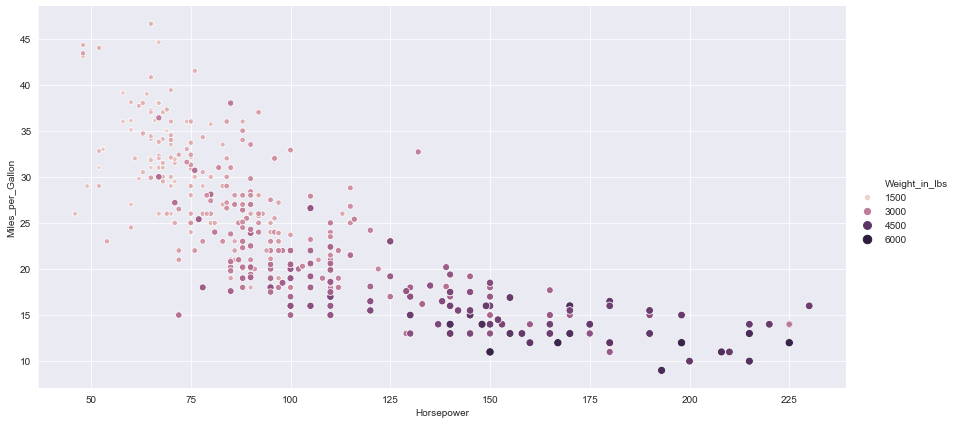

In [6]:
sns.relplot(data=df, x='Horsepower', y='Miles_per_Gallon', kind='scatter', hue='Weight_in_lbs', size='Weight_in_lbs',
            height=6, aspect=2)

### Scatterplot, hue != size

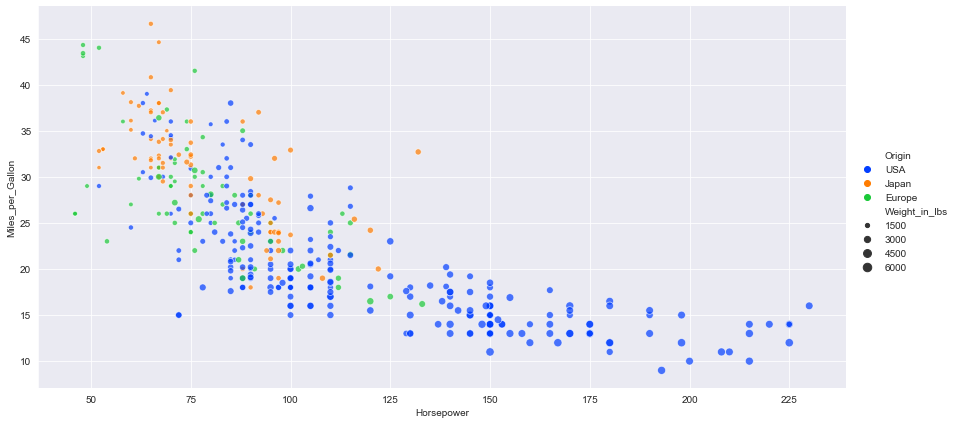

In [7]:
sns.relplot(data=df, x='Horsepower', y='Miles_per_Gallon', kind='scatter', hue='Origin', size='Weight_in_lbs',
            height=6, aspect=2, alpha=0.7)

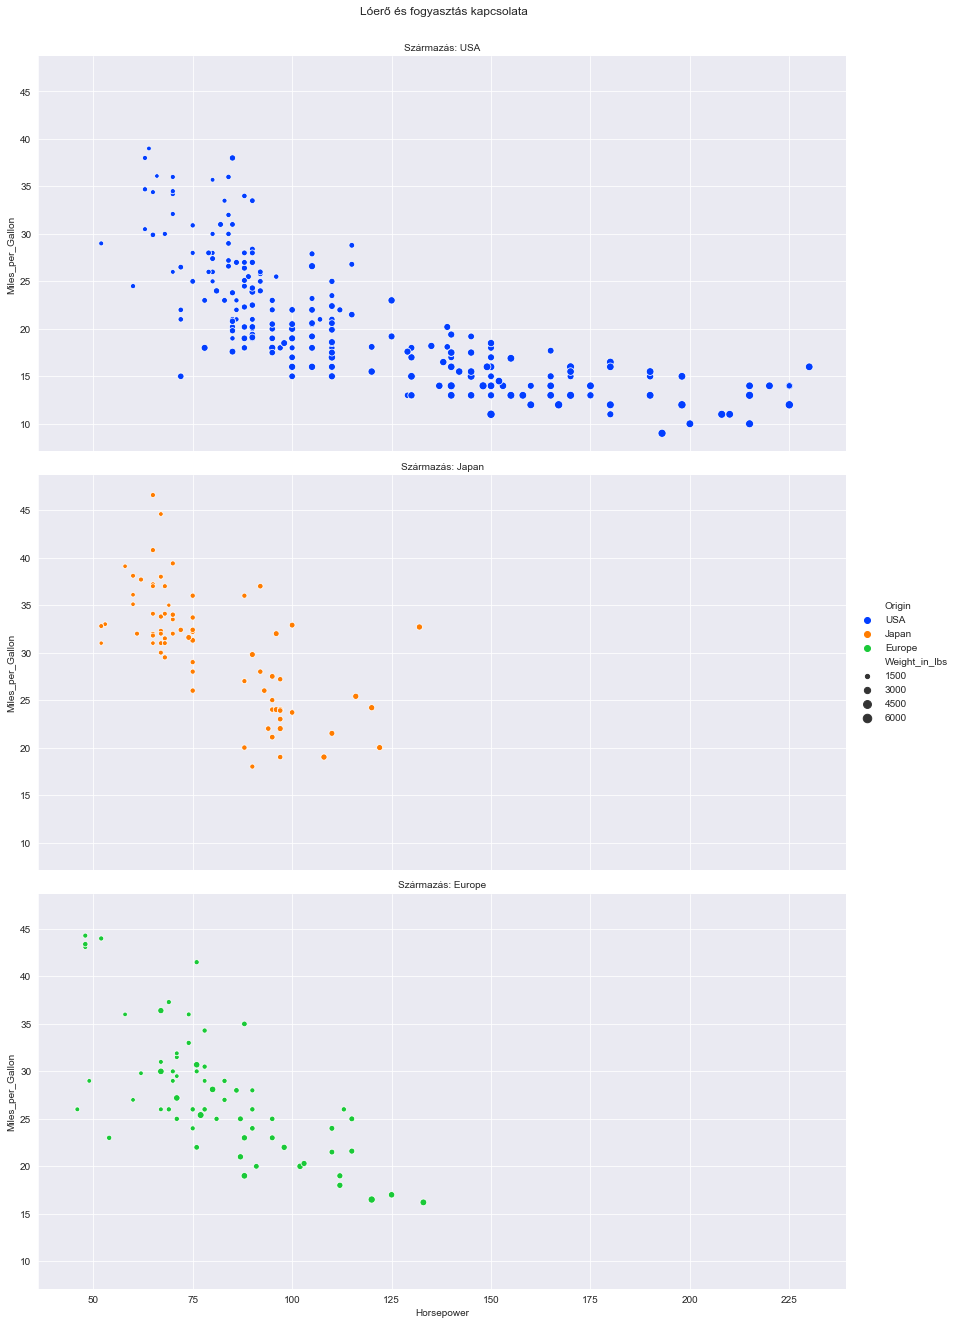

In [8]:
g = sns.relplot(data=df, x='Horsepower', y='Miles_per_Gallon', kind='scatter', hue='Origin', size='Weight_in_lbs',
            height=6, aspect=2, row='Origin')

g.fig.suptitle('Lóerő és fogyasztás kapcsolata', x=0.47, y=1.02)
g.set_titles('Származás: {row_name}')

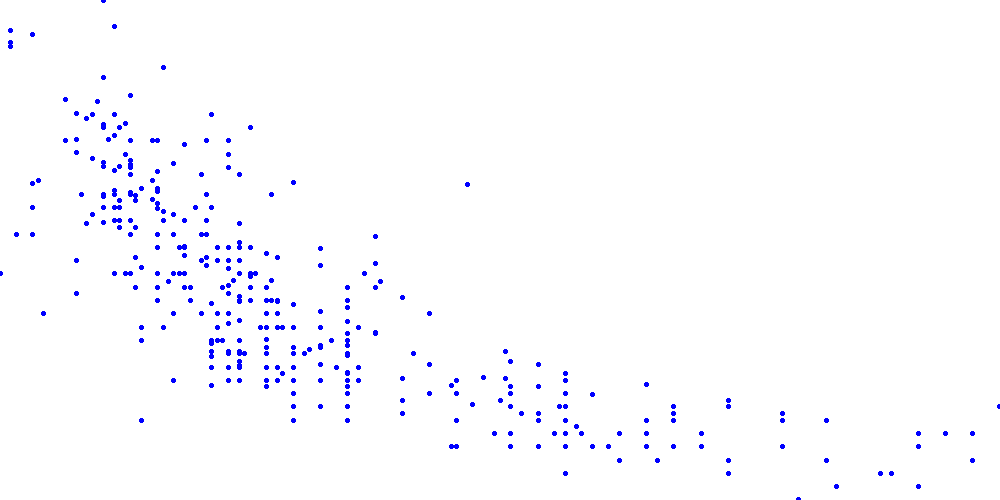

In [42]:
import datashader as ds
import datashader.glyphs
import datashader.transfer_functions as tf
from datashader.colors import Sets1to3

cvs = ds.Canvas(plot_width=1000, plot_height=500)

scatter_agg = cvs.points(df, 'Horsepower', 'Miles_per_Gallon') 
scatter_img = tf.shade(scatter_agg, cmap=['blue'], how='eq_hist') #how=linear #how=eq_hist 
scatter_img
#tf.set_background(scatter_img, 'blue')

ds.transfer_functions.dynspread(scatter_img, threshold=0.7, max_px=30, shape='circle', how='over', name=None)